## Sentiment Analysis and Its Correlation with Stock Price

In [ ]:
pip install pandas nltk transformers torch

In [12]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from datetime import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
# if you upload data from your local pc
# file_path = "C:/Users/ding/OneDrive - University of Warwick/03 Teaching/202425 - Fintech/news_articles_full.csv"
# df = pd.read_csv(file_path)

url = "https://raw.githubusercontent.com/yiding2022/Digital-Finance/main/news_articles_full.csv"
df = pd.read_csv(url)

In [16]:
# Clean tweet text
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower().strip()
    return text

df['cleaned_text'] = df['Content'].apply(clean_text)

In [17]:
df

,Date,Content,cleaned_text
0,"June 1, 2025 Sunday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...
1,"June 1, 2025 Sunday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...
2,"June 1, 2025 Sunday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...
3,"May 31, 2025 Saturday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...
4,"May 31, 2025 Saturday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...
...,...,...,...
495,"May 8, 2025 Thursday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...
496,"May 8, 2025 Thursday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...
497,"May 8, 2025 Thursday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...
498,"May 8, 2025 Thursday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...


In [18]:
# Step 4: Apply VADER
vader = SentimentIntensityAnalyzer()
df['vader_score'] = df['cleaned_text'].apply(lambda x: vader.polarity_scores(x)['compound'])

In [20]:
# Step 5: Apply Transformers-based Models
# FinBERT
finbert_pipeline = pipeline("sentiment-analysis", model="ProsusAI/finbert", tokenizer="ProsusAI/finbert")

# Truncate the cleaned_text to a maximum length before applying the pipeline
# A common max length for BERT models is 512 tokens. We will truncate the text string.
# The tokenizer will handle the exact token count, but truncating the string provides
# a reasonable upper bound to avoid excessively long sequences.
max_length = 512
df['finbert'] = df['cleaned_text'].apply(lambda x: finbert_pipeline(x[:max_length])[0]['score'])

Device set to use cpu


In [23]:
# DistilBERT
distilbert_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")
max_length = 512
df['distilbert'] = df['cleaned_text'].apply(lambda x: distilbert_pipeline(x[:max_length])[0]['score'])

Device set to use cpu


In [24]:
# RoBERTa
roberta_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")
max_length = 512
df['roberta'] = df['cleaned_text'].apply(lambda x: roberta_pipeline(x[:max_length])[0]['score'])

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


In [25]:
df

,Date,Content,cleaned_text,vader_score,finbert,distilbert,roberta
0,"June 1, 2025 Sunday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...,0.9983,0.877452,0.992438,0.924744
1,"June 1, 2025 Sunday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...,0.9965,0.901279,0.990829,0.757557
2,"June 1, 2025 Sunday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...,0.9953,0.927499,0.993878,0.860396
3,"May 31, 2025 Saturday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...,0.9983,0.868077,0.998485,0.772094
4,"May 31, 2025 Saturday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...,0.9961,0.727837,0.994142,0.808648
...,...,...,...,...,...,...,...
495,"May 8, 2025 Thursday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...,0.9977,0.873083,0.992410,0.584592
496,"May 8, 2025 Thursday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...,0.9979,0.909318,0.998337,0.780525
497,"May 8, 2025 Thursday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...,0.9986,0.947475,0.972456,0.884306
498,"May 8, 2025 Thursday","Copyright 2025 MarketBeat Media, LLC. All Righ...",copyright marketbeat media llc all rights res...,0.9973,0.855032,0.589375,0.584641


In [27]:
daily_sentiment = df.groupby("Date")[["vader_score", "finbert", "distilbert", "roberta"]].mean().reset_index()

In [28]:
daily_sentiment

,Date,vader_score,finbert,distilbert,roberta
0,"June 1, 2025 Sunday",0.996700,0.902077,0.992381,0.847566
1,"May 10, 2025 Saturday",0.997384,0.781995,0.945530,0.751924
2,"May 11, 2025 Sunday",0.997311,0.840648,0.970845,0.792430
3,"May 12, 2025 Monday",0.997105,0.750861,0.962501,0.765505
4,"May 13, 2025 Tuesday",0.997732,0.851964,0.962131,0.784552
5,"May 14, 2025 Wednesday",0.997500,0.803435,0.945290,0.799247
6,"May 15, 2025 Thursday",0.997536,0.772247,0.939051,0.758603
7,"May 16, 2025 Friday",0.997307,0.783601,0.912443,0.797946
8,"May 17, 2025 Saturday",0.997808,0.783307,0.962381,0.807143
9,"May 18, 2025 Sunday",0.996900,0.719205,0.941921,0.769729


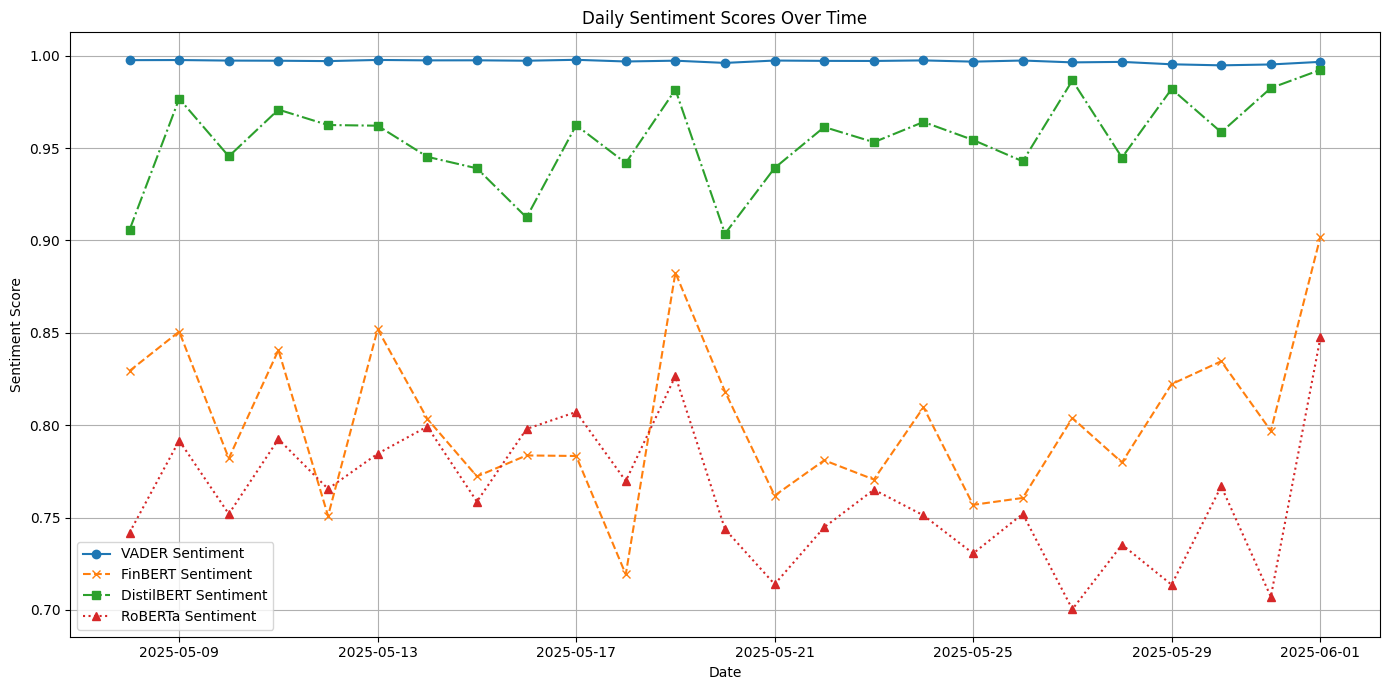

In [29]:
# Ensure 'Date' is in datetime format
daily_sentiment['Date'] = pd.to_datetime(daily_sentiment['Date'])

# Sort by Date
daily_sentiment = daily_sentiment.sort_values(by='Date')

# Plot the sentiment scores over time
plt.figure(figsize=(14, 7))

plt.plot(daily_sentiment['Date'], daily_sentiment['vader_score'], label='VADER Sentiment', marker='o', linestyle='-')
plt.plot(daily_sentiment['Date'], daily_sentiment['finbert'], label='FinBERT Sentiment', marker='x', linestyle='--')
plt.plot(daily_sentiment['Date'], daily_sentiment['distilbert'], label='DistilBERT Sentiment', marker='s', linestyle='-.')
plt.plot(daily_sentiment['Date'], daily_sentiment['roberta'], label='RoBERTa Sentiment', marker='^', linestyle=':')

plt.title('Daily Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
daily_sentiment

,Date,vader_score,finbert,distilbert,roberta
23,2025-05-08,0.997623,0.829377,0.905764,0.741849
24,2025-05-09,0.997680,0.850667,0.976767,0.791648
1,2025-05-10,0.997384,0.781995,0.945530,0.751924
2,2025-05-11,0.997311,0.840648,0.970845,0.792430
3,2025-05-12,0.997105,0.750861,0.962501,0.765505
4,2025-05-13,0.997732,0.851964,0.962131,0.784552
5,2025-05-14,0.997500,0.803435,0.945290,0.799247
6,2025-05-15,0.997536,0.772247,0.939051,0.758603
7,2025-05-16,0.997307,0.783601,0.912443,0.797946
8,2025-05-17,0.997808,0.783307,0.962381,0.807143


## import stock price data

In [58]:
# if you want to check the proceeded stock price data
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


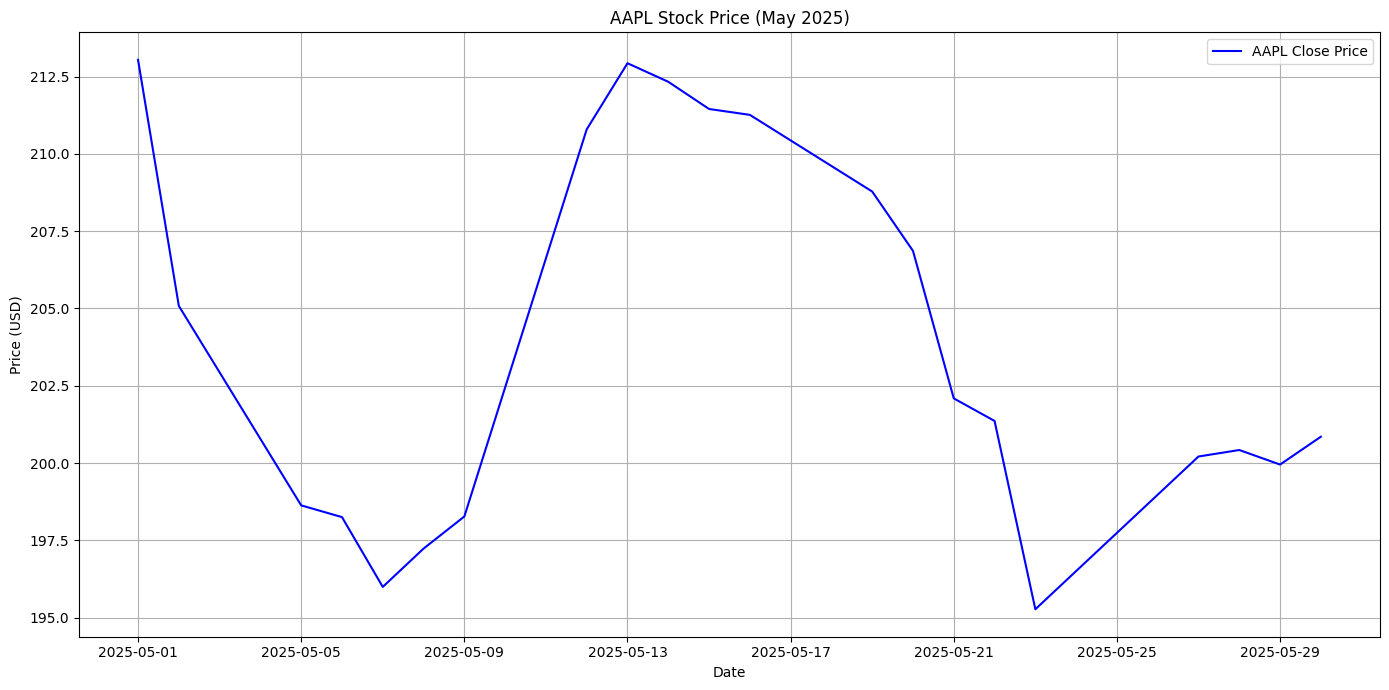

In [59]:
# Fetch AAPL stock data for the specified date range
start_date = '2025-05-01'
end_date = '2025-06-02'
aapl_data = yf.download('AAPL', start=start_date, end=end_date)

# Plot the closing price
plt.figure(figsize=(14, 7))
plt.plot(aapl_data.index, aapl_data['Close'], label='AAPL Close Price', color='blue')
plt.title('AAPL Stock Price (May 2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [60]:
aapl_data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-05-01,213.040634,214.279000,208.626409,208.806182,57365700
2025-05-02,205.081070,206.718922,201.895245,205.820091,101010600
2025-05-05,198.629532,203.832716,197.950430,202.834025,69018500
2025-05-06,198.250015,200.387212,196.761976,197.950420,51216500
2025-05-07,195.992981,199.178806,192.996910,198.909155,68536700
2025-05-08,197.231369,199.788014,194.425036,197.461064,50478900
2025-05-09,198.270004,200.277366,197.281295,198.739390,36453900
2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800


## correlation analysis

In [67]:
aapl_data

,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL
Date,,,,,
2025-05-01,213.040634,214.279000,208.626409,208.806182,57365700
2025-05-02,205.081070,206.718922,201.895245,205.820091,101010600
2025-05-05,198.629532,203.832716,197.950430,202.834025,69018500
2025-05-06,198.250015,200.387212,196.761976,197.950420,51216500
2025-05-07,195.992981,199.178806,192.996910,198.909155,68536700
2025-05-08,197.231369,199.788014,194.425036,197.461064,50478900
2025-05-09,198.270004,200.277366,197.281295,198.739390,36453900
2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800
2025-05-13,212.929993,213.399994,209.000000,210.429993,51909300


In [68]:
# If 'aapl_data' has MultiIndex columns, flatten them
if isinstance(aapl_data.columns, pd.MultiIndex):
    aapl_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in aapl_data.columns]

# Check if 'Date' is in index (likely from HTML/Excel scraping)
if aapl_data.index.name == 'Date':
    aapl_data.reset_index(inplace=True)

In [69]:
aapl_data

,Date,Close_AAPL,High_AAPL,Low_AAPL,Open_AAPL,Volume_AAPL
0,2025-05-01,213.040634,214.279000,208.626409,208.806182,57365700
1,2025-05-02,205.081070,206.718922,201.895245,205.820091,101010600
2,2025-05-05,198.629532,203.832716,197.950430,202.834025,69018500
3,2025-05-06,198.250015,200.387212,196.761976,197.950420,51216500
4,2025-05-07,195.992981,199.178806,192.996910,198.909155,68536700
5,2025-05-08,197.231369,199.788014,194.425036,197.461064,50478900
6,2025-05-09,198.270004,200.277366,197.281295,198.739390,36453900
7,2025-05-12,210.789993,211.270004,206.750000,210.970001,63775800
8,2025-05-13,212.929993,213.399994,209.000000,210.429993,51909300
9,2025-05-14,212.330002,213.940002,210.580002,212.429993,49325800


In [70]:
# Ensure 'Date' columns are datetime type
# daily_sentiment['Date'] is already converted to datetime in a previous step
# Assuming 'Date_' is the correct date column name in aapl_data based on the global variables
aapl_data['Date'] = pd.to_datetime(aapl_data['Date'])

# Lag AAPL stock price data by -1 day to match next day's price with current day's sentiment
aapl_data_lagged = aapl_data.copy()
aapl_data_lagged['Date'] = aapl_data_lagged['Date'] - pd.Timedelta(days=1)

# Merge the sentiment data with the lagged AAPL stock price data
# Use 'Close_AAPL' instead of 'Close' as the column name based on the global variables
merged_df = pd.merge(daily_sentiment, aapl_data_lagged[['Date', 'Close_AAPL']], on='Date', how='inner')

merged_df

,Date,vader_score,finbert,distilbert,roberta,Close_AAPL
0,2025-05-08,0.997623,0.829377,0.905764,0.741849,198.270004
1,2025-05-11,0.997311,0.840648,0.970845,0.792430,210.789993
2,2025-05-12,0.997105,0.750861,0.962501,0.765505,212.929993
3,2025-05-13,0.997732,0.851964,0.962131,0.784552,212.330002
4,2025-05-14,0.997500,0.803435,0.945290,0.799247,211.449997
5,2025-05-15,0.997536,0.772247,0.939051,0.758603,211.259995
6,2025-05-18,0.996900,0.719205,0.941921,0.769729,208.779999
7,2025-05-19,0.997333,0.882518,0.981671,0.826599,206.860001
8,2025-05-20,0.996125,0.818185,0.903661,0.743650,202.089996
9,2025-05-21,0.997409,0.761862,0.939239,0.713872,201.360001


Correlation between sentiment scores and Close price:
vader_score    0.343563
finbert        0.048155
distilbert     0.173732
roberta        0.664296
Name: Close_AAPL, dtype: float64


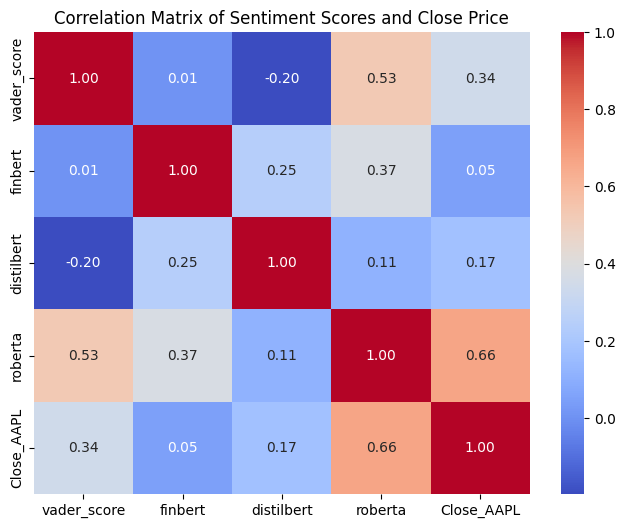

In [73]:
# prompt: calculate correlation between four sentiment scores and close price

# Calculate the correlation matrix
correlation_matrix = merged_df[['vader_score', 'finbert', 'distilbert', 'roberta', 'Close_AAPL']].corr()

# Print the correlation of each sentiment score with the 'Close' price
print("Correlation between sentiment scores and Close price:")
print(correlation_matrix['Close_AAPL'][['vader_score', 'finbert', 'distilbert', 'roberta']])

# Visualize the correlation matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Sentiment Scores and Close Price')
plt.show()